<h1><center>Lecture 23:<br>Context Free Grammars<br></center></h1><h2><center>Tuesday April 4 2022<br></center></h2>


<center><img src="https://www.nltk.org/book/tree_images/ch08-tree-4.png" width=800 height=800 /></center>

# Updates

## This week: Context Free Grammar
* **Reading:** NLTK Chp 8, Sections 1-3
* **Optional Reading:** J&M Chp 12, Sections 12.1 & 12.2
* **Optional experiment** on Canvas
* HW 5 Due next Tuesday
    * Part B now Extra Credit
* No class Thursday - Well-being Day
    * Don't do any work!
    * Try to get some rest and relax =)

* Other things: 
    * Tonight 6-8pm
        * https://moreheadplanetarium.org/calendar/carolina-science-cafe-lets-chat-about-chatgpt/
    * I will be out of the country on April 20th (Thursday before presentations). Plan accordingly!

### Questions, comments, concerns?

# Quiz 10 Review
## 1. Based on the Brown corpus, using the default tagset, how many possible tags exist for the word "down"?

In [ ]:
import nltk
from nltk.corpus import brown
brown_tagged = nltk.corpus.brown.tagged_words()
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_tagged if word.isalpha())

In [ ]:
data["down"]

In [ ]:
brown_tagged = nltk.corpus.brown.tagged_words(tagset = "universal")
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_tagged if word.isalpha())
data["down"]

## 2. Based on the Brown corpus, using the default tagset, what is the least common tag for the word "quick"?

In [ ]:
brown_tagged = nltk.corpus.brown.tagged_words()
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_tagged if word.isalpha())

In [ ]:
data["quick"]

## 3. PoS-taggers typically have high accuracy rates.

True

## 4. PoS-tagging has been developed for most of the world's languages.

False

## 5. Hidden Markov Models (HMMs) focus only on observed events, such as words we see in an input.

False

# Moving on!
* We have already dealt with ambiguity several times throughout the semester: 
    * Semantic (WordNet): _He stood on the **bank**._
    * Phonetic (CMU): _Where is the **lead**?_
    * Morphological: _Does your pencil have **lead**?_ vs. _Do you want to **lead**?_

## Syntactic ambiguity

* A famous example: Why is this comedic?

_While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know._

* Some more examples:
    * _The girl saw a dog in the park._
    * _I like mushy peas and mangoes._

* _The girl saw a dog in the park._
    1. The girl saw a dog while she was in the park.
    2. The girl saw a dog that was running in the park.
    <br>
* _I like mushy peas and mangoes._
    1. I like mushy peas and all mangoes (firm or mushy, doesn't matter).
    2. I like mushy peas and mushy mangoes.

# Recall n-gram language models
* When we create a text from n-grams, we get word salad.

In [ ]:
import nltk
from nltk.corpus import gutenberg
import random
emma = [word.lower() for word in gutenberg.words('austen-emma.txt') if word.isalpha()]
emmaTri = list(nltk.trigrams(emma))
emmaTriLM = [" ".join(random.choice(emmaTri)) for i in range(100)]
print(" ".join(emmaTriLM))

# Constituency
* A quick review from LING 101!
    * There are many Youtube videos, if you want to refresh more.
* One view of linguistic structure
* A CFG (or Phrase-structure grammar) parses phrases into **constituents**
* _The duck paddled up the river_
    * up the river - Yes!
    * duck paddled - No!

## Constituency Tests
* How do we know what is a constituent?
* Sometimes we can use our intuitions to determine what is a constituent
* But we also have many tests

* Substitution
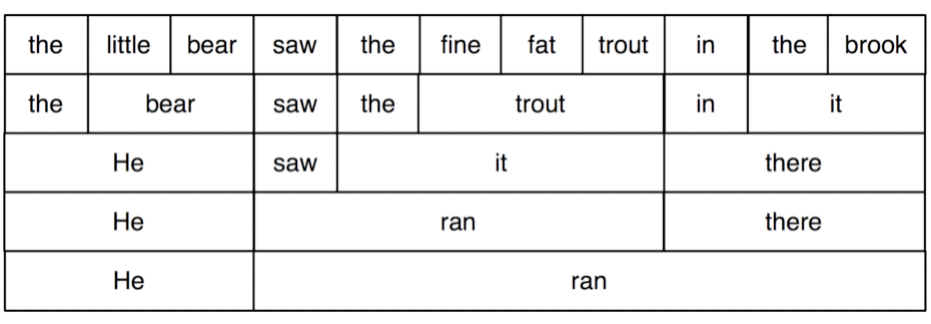

### Among others... (some work better than others)
* And sometimes we have differing opinions

* **Clefting**
    * Good: It was _in the brook_ that the little bear saw the fine fat trout ___.
    * Not good: It was _fine fat_ that the little bear saw the ___ trout in the brook.
* **Fragment answers**
    * Where did the little bear see the fine fat trout?
    * Good: _In the brook_
    
    * What was the trout the little bear saw?
    * Not good: _fine fat_
* **Coordination**
    * Good: _In the brook_ and _up the stream_
    * Not good: _fine fat_ and _good long_ 

# Syntactic dilemmas
* What are some properties of language (specifically syntax) that make NLP difficult?

* The number of possible phrases is infinite, but not all phrases are possible.
* Recursion: Nested constituents
    * I hope that you think that it might be the case that... (etc).
    * I love strong, bold, flavorful... (etc). coffee.

# Context Free Grammars (CFG)
* A way to represent syntactic structure through _rules_
    * Not theoretically exhaustive (e.g. X' Theory)
* We can use these rules to represent sentences with trees
* G = (T,N,S,R):
    * T: set of terminal symbols
    * N: set of non-terminal symbols
    * S: start symbol (sometimes we also extend this to root)
    * R: set of rules
* Grammar G generates language L

S -> NP VP<br>
NP -> Det N | 'I' <br>
VP -> V NP <br>
Det -> 'an' <br>
N -> 'elephant' <br>
V -> 'shot' 

* Accepted by the grammar: 
    * I shot an elephant.
    * An elephant shot I.
* Not accepted by the grammar:
    * I ate a lot of ice cream.
    * Elephant shot I an.

### Representing rules with trees
* Terminal nodes are lexical items (words)
* Anything at the phrase level is a constituent

### How does this help us disambiguate an ambiguous phrase?
* What is the meaning we get from this tree?

S -> NP VP\
PP -> P NP\
NP -> Det N | Det N PP | 'I'\
VP -> V NP | VP PP\
Det -> 'an' | 'my'\
N -> 'elephant' | 'pajamas'\
V -> 'shot'\
P -> 'in'

<center><img src="https://www.nltk.org/book_1ed/tree_images/ch08-tree-1.png" width=800 height=800 /></center>

<center><img src="https://miro.medium.com/max/880/1*plerbIHmh2kEvaqepJrHdQ.png" width=800 height=800 /></center>

# Let's take a look at what NLTK can do

In [ ]:
import nltk
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
parser = nltk.ChartParser(grammar)

In [ ]:
sent = ["I", "shot", "an", "elephant"]
for tree in parser.parse(sent):
    print(tree)

In [ ]:
for tree in parser.parse(sent):
    tree.draw()

### What happens if we give the parser a sentence not supported by the grammar?

S -> NP VP<br>
PP -> P NP <br>
NP -> Det N | Det N PP | 'I' <br>
VP -> V NP | VP PP <br>
Det -> 'an' | 'my' <br>
N -> 'elephant' | 'pajamas' <br>
V -> 'shot' <br>
P -> 'in'

In [ ]:
sent = ["I", "really", "love", "coffee"]
for tree in parser.parse(sent):
    print(tree)

In [ ]:
sent = ["An", "elephant", "shot", "my", "pajamas"] 
# What will this do?
for tree in parser.parse(sent):
    print(tree)

### What happens if we give the parser an ambiguous sentence?

In [ ]:
pjs = ["I", "shot", "an", "elephant", "in", "my", "pajamas"]
for tree in parser.parse(pjs):
    print(tree)

In [ ]:
for tree in parser.parse(pjs):
    tree.draw()

# You can create your own (larger) grammar!

In [ ]:
grammar = nltk.data.load('file:mygrammar.cfg')
sent = "I shot an elephant in my pajamas".split()
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
    print(tree)

# Probabilistic Context Free Grammar (PCFG)
* We've used probability quite a bit with NLP
    * This helps us determine which phrases are more "natural"
* Each rule is given a probability
* The rules across a particular non-terminal node (e.g. NP, VP) should add up to 1

| Rule      | Probability |
| :----------- | ----------- |
| S -> NP VP  |  1.0   |
| VP -> V NP   | 0.6  |
| VP -> V NP PP   | 0.4  |
| NP -> NP NP   | 0.1  |
| NP -> NP PP   | 0.2  |
|NP -> N   | 0.7  |
| PP -> P NP   | 1.0  |

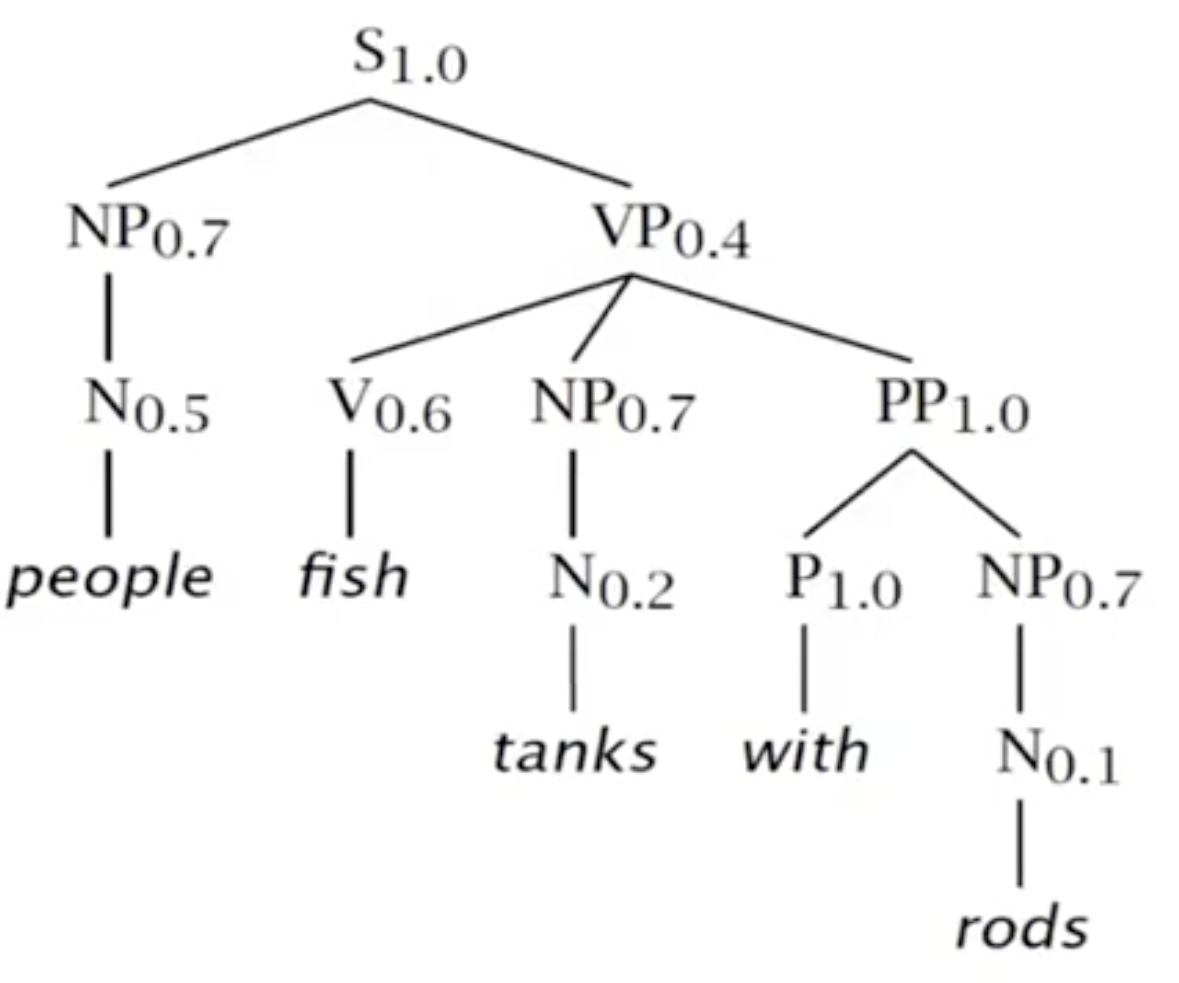

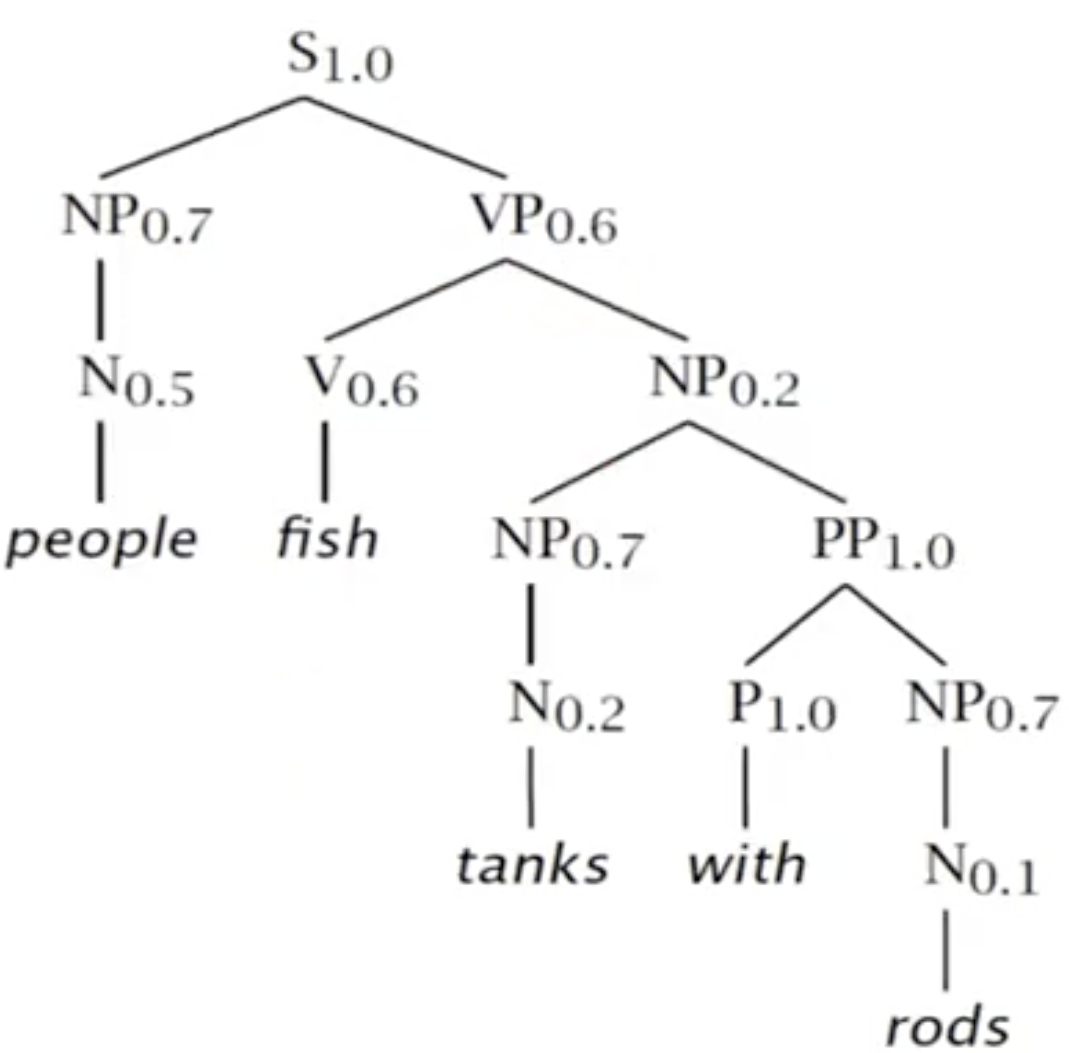

# Dependencies Grammar
* We wont focus on this so much.
* Alternative to CFG
* Instead of constituents, we care about what lexical items _require_
    * Which words depend on (modify or are arguments of) other words.

* Argument structure: What does the verb _put_ require?

    * _The boy put the tortoise on the rug._

# Recursive descent parser
* An interactive app built into NLTK to create grammars/structures

In [ ]:
nltk.app.rdparser()

# UPenn Treebanks Corpus
* How can we represent syntactic structure in corpora?
    * NLTK has several treebanks corpora

* UPenn Treebanks is an annotated corpus of sentences taken from Wall Street Journal
* We can view a portion of it with NLTK
    * You have to pay to access the entire UPenn Treebanks corpus =(

In [ ]:
from nltk.corpus import treebank

In [ ]:
t = treebank.parsed_sents('wsj_0010.mrg')[0]
print(t)

In [ ]:
t.draw()

# Reminders
   * No class Thursday
   * "Quiz" 11 due Friday
    
# Have a great long weekend!
   * When we come back: NLP & Society
   * How can we look at trends or issues in society using NLP?
   * What ethical concerns exist in NLP?